Veremos agora como nosso modelo está se comportando ao se deparar com dados nunca vistos.

Lembrando que o dataset que usamos pra treino é de apenas 10 imagens e o Keras não é o melhor modelo recomendado para fazer detecção de objetos.

In [71]:
import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np

Importando o melhor modelo

In [72]:
best_model = keras.models.load_model('car_detection_model_best.keras')

Pré processando a imagem de teste antes de enviar ao modelo

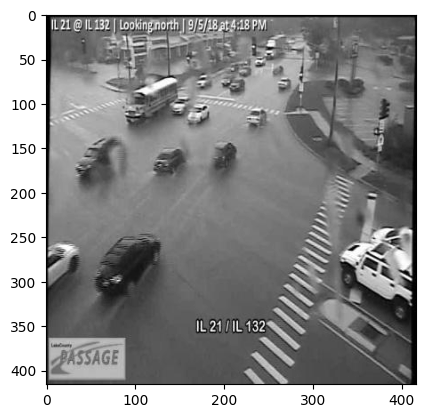

In [73]:
img_path = 'test_images/carros_01.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

In [74]:
original_h, original_w = img.shape

resized_img = cv2.resize(img, (128,128),
                         interpolation=cv2.INTER_LANCZOS4)

# Redimensionando a imagem para ter (128,128,1) como o modelo espera
resized_img = np.expand_dims(resized_img, axis=-1)

# Normaliza a imagem para o intervalo [0, 1] como foi feito no treinamento
resized_img = resized_img / 255.0

# A forma esperada pelo modelo é (1, 128, 128, 1), ou seja, um "lote" de uma imagem
# A função abaixo é usada para adicionar a dimensão do lote
resized_img = np.expand_dims(resized_img, axis=0)

predicted_boxes = best_model.predict(resized_img)

# Aqui a predição tem o formato (1, 5*4), então precisamos separá-lo
predicted_boxes = predicted_boxes.reshape(-1, 4)
predicted_boxes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[10.655269  , 17.287455  ,  4.1756716 ,  6.591082  ],
       [16.925165  , 15.725627  ,  2.2287343 ,  2.0602796 ],
       [18.79205   ,  9.0673485 ,  2.0165114 ,  3.1837845 ],
       [20.545038  ,  5.402511  ,  0.23172376,  0.78525084],
       [18.318365  , 11.069038  ,  3.5266151 ,  2.8842807 ]],
      dtype=float32)

**Reverter as coordenadas das caixas para o tamanho original da imagem**

In [75]:
scaled_boxes = []
for box in predicted_boxes:
    x, y, w, h = box

    x = x * original_w / 128
    y = y * original_h / 128
    w = w * original_w / 128
    h = h * original_h / 128

    scaled_boxes.append([x, y, w, h])

scaled_boxes

[[34.62962317466736,
  56.18422746658325,
  13.570932626724243,
  21.421016812324524],
 [55.006786823272705, 51.10828757286072, 7.243386328220367, 6.695908725261688],
 [61.0741605758667, 29.46888256072998, 6.553662180900574, 10.347299575805664],
 [66.77137422561646,
  17.55816113948822,
  0.7531022056937218,
  2.5520652383565903],
 [59.53468656539917, 35.974374771118164, 11.461499214172363, 9.37391221523285]]

In [76]:
def draw_boxes(img, boxes):
    for box in boxes:
        x, y, w, h = box

        cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)),
                      color=(255,255,0),
                      thickness=4)
    
    return img

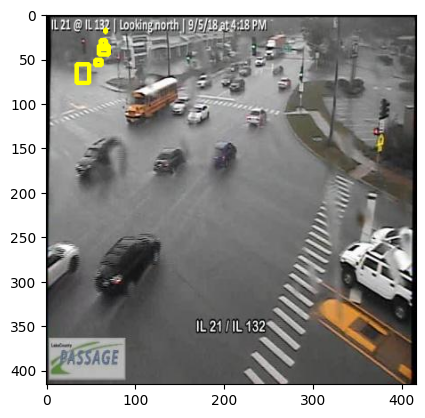

In [77]:
output_img = cv2.imread(img_path)
output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

output_img = draw_boxes(output_img, scaled_boxes)

plt.imshow(output_img)